# Exploratory Data Analysis

## 1. Introduction

This notebook will be responsible for the initial data analysis.

In [49]:
%pip install aequitas aif360 fairlearn aif360[inFairness]

Note: you may need to restart the kernel to use updated packages.


In [2]:
import warnings
warnings.filterwarnings('ignore')

## 2. Load the dataset

In [3]:
import pandas as pd
url = 'https://raw.githubusercontent.com/DanielCarneiro123/compas-machine-bias/refs/heads/main/compas-scores-two-years.csv'
raw_data = pd.read_csv(url)

raw_data.describe()

,id,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_days_from_compas,is_recid,r_days_from_arrest,violent_recid,is_violent_recid,decile_score.1,v_decile_score,priors_count.1,start,end,event,two_year_recid
count,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,6907.000000,7192.000000,7214.000000,2316.000000,0.0,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000
mean,5501.255753,34.817993,0.067230,4.509565,0.090934,0.109371,3.472415,3.304763,57.731368,0.481148,20.269430,NaN,0.113529,4.509565,3.691849,3.472415,11.465068,553.436651,0.382867,0.450652
std,3175.706870,11.888922,0.473972,2.856396,0.485239,0.501586,4.882538,75.809505,329.740215,0.499679,74.871668,NaN,0.317261,2.856396,2.510148,4.882538,46.954563,399.020583,0.486120,0.497593
min,1.000000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-414.000000,0.000000,0.000000,-1.000000,NaN,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2735.250000,25.000000,0.000000,2.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,0.000000,0.000000,NaN,0.000000,2.000000,1.000000,0.000000,0.000000,148.250000,0.000000,0.000000
50%,5509.500000,31.000000,0.000000,4.000000,0.000000,0.000000,2.000000,-1.000000,1.000000,0.000000,0.000000,NaN,0.000000,4.000000,3.000000,2.000000,0.000000,530.500000,0.000000,0.000000
75%,8246.500000,42.000000,0.000000,7.000000,0.000000,0.000000,5.000000,0.000000,2.000000,1.000000,1.000000,NaN,0.000000,7.000000,5.000000,5.000000,1.000000,914.000000,1.000000,1.000000
max,11001.000000,96.000000,20.000000,10.000000,13.000000,17.000000,38.000000,1057.000000,9485.000000,1.000000,993.000000,NaN,1.000000,10.000000,10.000000,38.000000,937.000000,1186.000000,1.000000,1.000000


In [4]:
raw_data.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


## 3. Feature selecting

The original dataset consists of **7214** rows and **52 features**. However, several features, such as name, last name, middle name, and dates, are irrelevant to the case study. These features can be removed to focus on the most informative and relevant variables for analysis.

We will start by selecting only some features we consider relevant:

In [5]:
relevant_features =['age', 'c_charge_degree', 'race', 'age_cat', 'score_text', 'sex',
               'priors_count', 'days_b_screening_arrest', 'decile_score', 'is_recid',
               'two_year_recid', 'c_jail_in', 'c_jail_out', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'r_charge_degree', 'is_violent_recid', 'vr_charge_degree', 'v_score_text']

df = raw_data[relevant_features]

## 4. Data filtering

Some records contain data quality issues based on specific context rules. For example, if the charge date of a defendant's COMPAS-scored crime does not fall within 30 days of their arrest date, the offense may not be correctly identified.

In [6]:
# Drop rows where days_b_screening_arrest is invalid
df = df[(df['days_b_screening_arrest'] <= 30) &
        (df['days_b_screening_arrest'] >= -30)]

df.describe()

,age,priors_count,days_b_screening_arrest,decile_score,is_recid,two_year_recid,juv_fel_count,juv_misd_count,juv_other_count,is_violent_recid
count,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000
mean,34.534511,3.246436,-1.740279,4.418503,0.484446,0.455120,0.059300,0.091218,0.110661,0.112119
std,11.730938,4.743770,5.084709,2.839463,0.499799,0.498022,0.463599,0.497872,0.470731,0.315539
min,18.000000,0.000000,-30.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,-1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,31.000000,1.000000,-1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,42.000000,4.000000,-1.000000,7.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,96.000000,38.000000,30.000000,10.000000,1.000000,1.000000,20.000000,13.000000,9.000000,1.000000


After data filtering, there is no more missing values in the dataset.

## 5. Feature engineering

Among the selected features, `c_jail_in` and `c_jail_out` are in DateTime format and, on their own, provide limited value to the model. To make this information more useful, we will create a new feature `length_of_stay` that calculates the time difference between these two dates, representing the duration of the jail stay.

In [7]:
df['c_jail_in'] = pd.to_datetime(df['c_jail_in'])
df['c_jail_out'] = pd.to_datetime(df['c_jail_out'])

# Add a new column for length of stay
df['length_of_stay'] = (df['c_jail_out'] - df['c_jail_in']).dt.days

# Drop the jail in and jail out columns
df = df.drop(columns=['c_jail_in', 'c_jail_out'])

Now, we can examine the correlation between the length of jail stay and the obtained COMPAS scores. This will help us understand if the duration of incarceration has any relationship with the scoring outcomes.

In [8]:
correlation = df['length_of_stay'].corr(df['decile_score'])
print(f"Correlation between length of stay and decile score: {correlation:.2f}")

Correlation between length of stay and decile score: 0.21


## 6. Demographic Breakdown



,Race,Percentage
0,African-American,51.44%
1,Caucasian,34.07%
2,Hispanic,8.25%
3,Asian,0.50%
4,Native American,0.18%


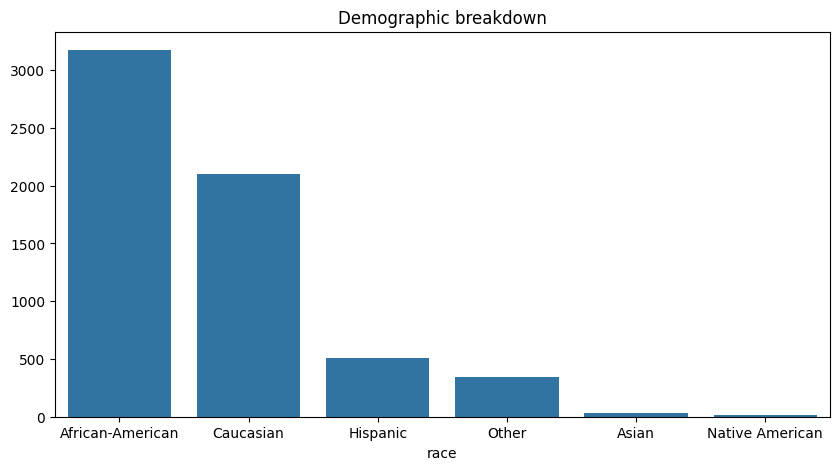

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

races = df['race'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=races.index, y=races.values)
plt.title('Demographic breakdown')

data = {
    "Race": ["African-American", "Caucasian", "Hispanic", "Asian", "Native American"],
    "Percentage": [
        f"{races.get('African-American', 0) / len(df) * 100:.2f}%",
        f"{races.get('Caucasian', 0) / len(df) * 100:.2f}%",
        f"{races.get('Hispanic', 0) / len(df) * 100:.2f}%",
        f"{races.get('Asian', 0) / len(df) * 100:.2f}%",
        f"{races.get('Native American', 0) / len(df) * 100:.2f}%"
    ]
}

races_df = pd.DataFrame(data)
races_df


## 7. Age Categorization

,Race,Percentage
0,Less than 25,21.82%
1,25 - 45,57.23%
2,Greater than 45,20.95%


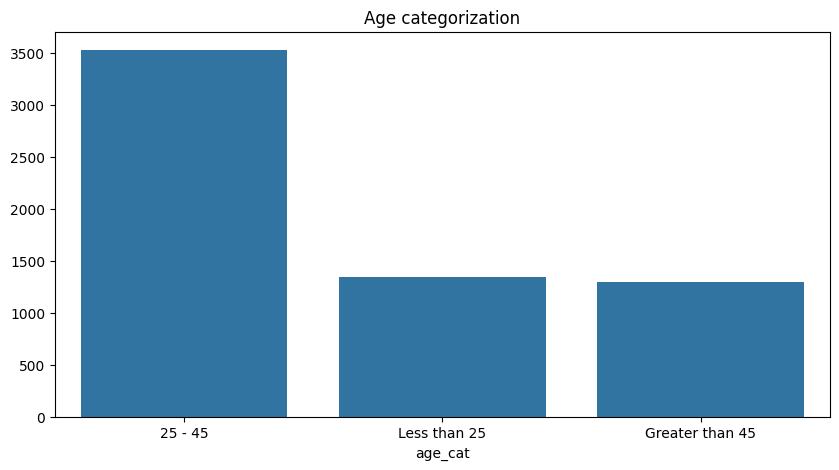

In [10]:
ages = df['age_cat'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=ages.index, y=ages.values)
plt.title('Age categorization')

data = {
    "Race": ["Less than 25", "25 - 45", "Greater than 45"],
    "Percentage": [
        f"{ages.get('Less than 25', 0) / len(df) * 100:.2f}%",
        f"{ages.get('25 - 45', 0) / len(df) * 100:.2f}%",
        f"{ages.get('Greater than 45', 0) / len(df) * 100:.2f}%"
    ]
}

ages_df = pd.DataFrame(data)
ages_df

## 8. Genre distribution

,Genre,Percentage
0,Male,80.96%
1,Female,19.04%


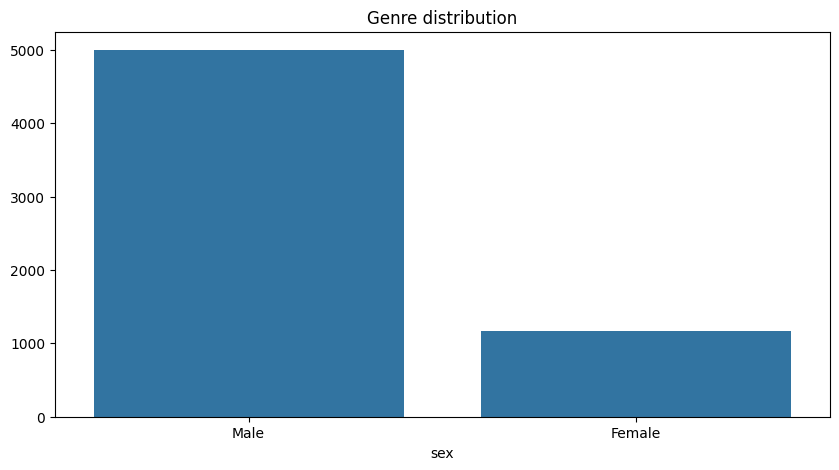

In [11]:
genres = df['sex'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=genres.index, y=genres.values)
plt.title('Genre distribution')

data = {
    "Genre": ["Male", "Female"],
    "Percentage": [
        f"{genres.get('Male', 0) / len(df) * 100:.2f}%",
        f"{genres.get('Female', 0) / len(df) * 100:.2f}%"
    ]
}

genres_df = pd.DataFrame(data)
genres_df

## 9. Two-year recidivism rate

In [12]:
two_year_recid_count = df[df['two_year_recid'] == 1].shape[0]
two_year_recid_rate = (two_year_recid_count / len(df)) * 100
print(f"Two-year recidivism rate: {two_year_recid_rate:.2f}%")

Two-year recidivism rate: 45.51%


## 10. Decile_score distribution by Race for African-American and Caucasian defendants

This cell visualizes the distribution of **decile_score** values for African-American and Caucasian defendants, providing insight into score differences across racial groups.

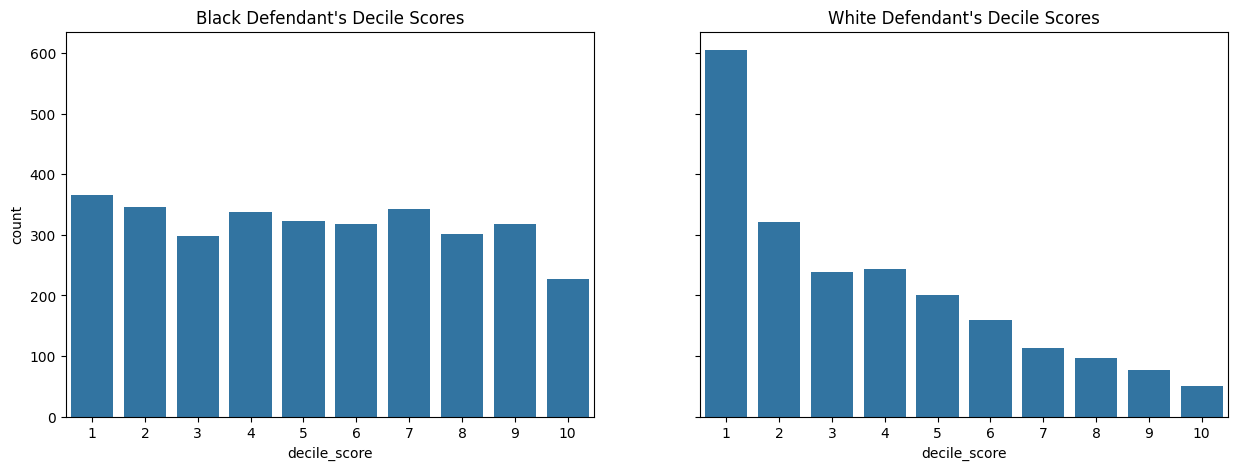

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
sns.countplot(x="decile_score", data=df[df['race'] == "African-American"], ax=axes[0])
axes[0].set_title("Black Defendant's Decile Scores")
sns.countplot(x="decile_score", data=df[df['race'] == "Caucasian"], ax=axes[1])
axes[1].set_title("White Defendant's Decile Scores")
plt.show()

In [14]:
import numpy as np

o_df = df.copy()

df = pd.get_dummies(df, columns=['c_charge_degree', 'age_cat', 'race', 'sex'])

df['c_charge_degree'] = o_df['c_charge_degree']
df['age_cat'] = o_df['age_cat']
df['race'] = o_df['race']
df['sex'] = o_df['sex']


df['score_factor'] = np.where(df['score_text'] != "Low", 1, 0)

df.to_csv('dataset_preprocessed.csv', index=False)

# Logistic Regression Classifier


In [15]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

df = pd.read_csv('dataset_preprocessed.csv')

X_columns = [
    'sex_Male', 'age_cat_Greater than 45', 'age_cat_Less than 25', 'age_cat_25 - 45',
    'race_African-American', 'race_Asian', 'race_Hispanic', 'race_Native American',
    'race_Other', 'priors_count', 'two_year_recid', 'length_of_stay'
]

X = df[X_columns].copy()
y = df['score_factor']

scaler = StandardScaler()
X[['priors_count', 'length_of_stay']] = scaler.fit_transform(X[['priors_count', 'length_of_stay']])

log_reg = LogisticRegression()
log_reg.fit(X, y)

y_pred = log_reg.predict(X)
df['predicted_score'] = y_pred


df.to_csv('compas_with_predictions.csv', index=False)

# Aequitas

In [16]:
import pandas as pd
from aequitas import Audit

import aequitas.plot as ap
from fairlearn.metrics import MetricFrame, selection_rate, false_positive_rate, false_negative_rate, true_positive_rate, true_negative_rate,equalized_odds_difference
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric
from aif360.algorithms.preprocessing import Reweighing
from sklearn.preprocessing import LabelEncoder

pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[inFairness]'


In [17]:
columns_to_select = [
    "sex", "age_cat", "race", "juv_fel_count", "decile_score", "juv_misd_count", "juv_other_count",
    "c_charge_degree", "is_recid", "r_charge_degree", "is_violent_recid",
    "vr_charge_degree", "score_text", "v_score_text", "two_year_recid", "days_b_screening_arrest",
    "score_factor", "predicted_score"
]

df = pd.read_csv("compas_with_predictions.csv")[columns_to_select]

In [18]:
df = df.dropna()

df = df[df['race'] != 'Asian']

In [19]:
df = df.drop(columns=['days_b_screening_arrest'])

In [20]:
for column in df.columns:
    df[column] = df[column].astype('object')


df['score_factor'] = df['score_factor'].astype('int')

In [21]:
reference = df.loc[(df['race'] == 'Caucasian') & (df['sex'] == 'Male') & (df['age_cat'] == '25 - 45') & (df['score_text'] == 'Low')]


reference = reference.iloc[0]
reference.drop(['predicted_score', 'score_factor'], inplace=True)

reference = reference.to_dict()
reference

{'sex': 'Male',
 'age_cat': '25 - 45',
 'race': 'Caucasian',
 'juv_fel_count': 0,
 'decile_score': 3,
 'juv_misd_count': 0,
 'juv_other_count': 0,
 'c_charge_degree': 'M',
 'is_recid': 1,
 'r_charge_degree': '(M2)',
 'is_violent_recid': 1,
 'vr_charge_degree': '(M1)',
 'score_text': 'Low',
 'v_score_text': 'Low',
 'two_year_recid': 1}

In [22]:
audit = Audit(df,
              label_column="predicted_score",
              score_column="score_factor",
              sensitive_attribute_column=["sex", "age_cat", "race", "is_recid", "is_violent_recid", "c_charge_degree", "decile_score", "juv_fel_count", "juv_misd_count", "juv_other_count", "r_charge_degree", "vr_charge_degree", "score_text", "v_score_text", "two_year_recid"],
              reference_groups=reference)
audit.audit()

In [23]:
audit.confusion_matrix

pp   pn  fp  fn   tn   tp  group_label_pos  \
attribute_name attribute_value                                                
sex            Female            49   33  10   6   27   39               45   
               Male             401  206  62  69  137  339              408   
age_cat        25 - 45          274  150  51  36  114  223              259   
               Greater than 45   30   52  15   6   46   15               21   
               Less than 25     146   37   6  33    4  140              173   
...                             ...  ...  ..  ..  ...  ...              ...   
v_score_text   High             140    1  13   1    0  127              128   
               Low              120  206  31  52  154   89              141   
               Medium           190   32  28  22   10  162              184   
two_year_recid 0                 21   19  12   4   15    9               13   
               1                429  220  60  71  149  369              440   

                                group_label_neg  group_size  total_entities  
attribute_name attribute_value                                               
sex            Female                        37          82             689  
               Male                         199         607             689  
age_cat        25 - 45                      165         424             689  
               Greater than 45               61          82             689  
               Less than 25                  10         183             689  
...                                         ...         ...             ...  
v_score_text   High                          13         141             689  
               Low                          185         326             689  
               Medium                        38         222             689  
two_year_recid 0                             27          40             689  
               1                            209         649             689  

[74 rows x 10 columns]

In [24]:
audit.metrics.round(2)

accuracy   tpr   tnr   for   fdr   fpr   fnr  \
attribute_name attribute_value                                                 
sex            Female               0.80  0.87  0.73  0.18  0.20  0.27  0.13   
               Male                 0.78  0.83  0.69  0.33  0.15  0.31  0.17   
age_cat        25 - 45              0.79  0.86  0.69  0.24  0.19  0.31  0.14   
               Greater than 45      0.74  0.71  0.75  0.12  0.50  0.25  0.29   
               Less than 25         0.79  0.81  0.40  0.89  0.04  0.60  0.19   
...                                  ...   ...   ...   ...   ...   ...   ...   
v_score_text   High                 0.90  0.99  0.00  1.00  0.09  1.00  0.01   
               Low                  0.75  0.63  0.83  0.25  0.26  0.17  0.37   
               Medium               0.77  0.88  0.26  0.69  0.15  0.74  0.12   
two_year_recid 0                    0.60  0.69  0.56  0.21  0.57  0.44  0.31   
               1                    0.80  0.84  0.71  0.32  0.14  0.29  0.16   

                                 npv  precision   ppr  pprev  prev  
attribute_name attribute_value                                      
sex            Female           0.82       0.80  0.11   0.60  0.55  
               Male             0.67       0.85  0.89   0.66  0.67  
age_cat        25 - 45          0.76       0.81  0.61   0.65  0.61  
               Greater than 45  0.88       0.50  0.07   0.37  0.26  
               Less than 25     0.11       0.96  0.32   0.80  0.95  
...                              ...        ...   ...    ...   ...  
v_score_text   High             0.00       0.91  0.31   0.99  0.91  
               Low              0.75       0.74  0.27   0.37  0.43  
               Medium           0.31       0.85  0.42   0.86  0.83  
two_year_recid 0                0.79       0.43  0.05   0.52  0.32  
               1                0.68       0.86  0.95   0.66  0.68  

[74 rows x 12 columns]

In [25]:
metrics = ['fpr','fdr']
disparity_tolerance = 1.25

In [26]:
audit.disparities.style

In [27]:
audit.disparity_plot(metrics=metrics, attribute='race', fairness_threshold=disparity_tolerance)

alt.LayerChart(...)

In [28]:
from aequitas.group import Group

group = Group()
xtab = group.get_crosstabs(df, score_col='score_factor', label_col='predicted_score', attr_cols = ["sex", "age_cat", "race", "is_recid", "is_violent_recid", "c_charge_degree", "decile_score", "juv_fel_count", "juv_misd_count", "juv_other_count", "r_charge_degree", "vr_charge_degree", "score_text", "v_score_text", "two_year_recid"])

xtab = xtab[0]
xtab

,model_id,score_threshold,k,attribute_name,attribute_value,accuracy,tpr,tnr,for,fdr,...,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev
0,0,binary 0/1,450,sex,Female,0.804878,0.866667,0.729730,0.181818,0.204082,...,0.597561,10,6,27,39,45,37,82,689,0.548780
1,0,binary 0/1,450,sex,Male,0.784185,0.830882,0.688442,0.334951,0.154613,...,0.660626,62,69,137,339,408,199,607,689,0.672158
2,0,binary 0/1,450,age_cat,25 - 45,0.794811,0.861004,0.690909,0.240000,0.186131,...,0.646226,51,36,114,223,259,165,424,689,0.610849
3,0,binary 0/1,450,age_cat,Greater than 45,0.743902,0.714286,0.754098,0.115385,0.500000,...,0.365854,15,6,46,15,21,61,82,689,0.256098
4,0,binary 0/1,450,age_cat,Less than 25,0.786885,0.809249,0.400000,0.891892,0.041096,...,0.797814,6,33,4,140,173,10,183,689,0.945355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,0,binary 0/1,450,v_score_text,High,0.900709,0.992188,0.000000,1.000000,0.092857,...,0.992908,13,1,0,127,128,13,141,689,0.907801
70,0,binary 0/1,450,v_score_text,Low,0.745399,0.631206,0.832432,0.252427,0.258333,...,0.368098,31,52,154,89,141,185,326,689,0.432515
71,0,binary 0/1,450,v_score_text,Medium,0.774775,0.880435,0.263158,0.687500,0.147368,...,0.855856,28,22,10,162,184,38,222,689,0.828829
72,0,binary 0/1,450,two_year_recid,0,0.600000,0.692308,0.555556,0.210526,0.571429,...,0.525000,12,4,15,9,13,27,40,689,0.325000


In [29]:
from aequitas.bias import Bias

bias = Bias()
hbdf = bias.get_disparity_predefined_groups(df=xtab, original_df=df, ref_groups_dict=reference, alpha=0.05, mask_significance=True)

In [30]:
hbdf[['attribute_name', 'attribute_value'] +
      bias.list_disparities(hbdf) + bias.list_significance(hbdf)]

,attribute_name,attribute_value,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity
0,sex,Female,0.122195,0.904537,0.941485,1.319947,0.542819,0.867480,0.788406,1.043068,1.059972,1.230259
1,sex,Male,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,age_cat,25 - 45,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,age_cat,Greater than 45,0.109489,0.566139,0.614350,2.686275,0.480769,0.795564,2.055556,0.829596,1.091458,1.163968
4,age_cat,Less than 25,0.532847,1.234574,1.178205,0.220790,3.716216,1.941176,1.372351,0.939890,0.578947,0.142248
...,...,...,...,...,...,...,...,...,...,...,...,...
69,v_score_text,High,1.166667,2.697400,1.223114,0.359447,3.961538,5.967742,0.021184,1.571893,0.000000,0.000000
70,v_score_text,Low,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
71,v_score_text,Medium,1.583333,2.325075,1.149616,0.570458,2.723558,4.397284,0.324206,1.394846,0.316131,0.418019
72,two_year_recid,0,0.048951,0.794231,0.498258,4.085714,0.652335,1.548148,1.906826,0.825516,0.779269,1.165666


In [31]:
majority_bdf = bias.get_disparity_major_group(xtab, original_df=df)
majority_bdf[['attribute_name', 'attribute_value'] +  bias.list_disparities(majority_bdf)]

,attribute_name,attribute_value,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity
0,sex,Female,0.122195,0.904537,0.941485,1.319947,0.542819,0.867480,0.788406,1.043068,1.059972,1.230259
1,sex,Male,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,age_cat,25 - 45,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,age_cat,Greater than 45,0.109489,0.566139,0.614350,2.686275,0.480769,0.795564,2.055556,0.829596,1.091458,1.163968
4,age_cat,Less than 25,0.532847,1.234574,1.178205,0.220790,3.716216,1.941176,1.372351,0.939890,0.578947,0.142248
...,...,...,...,...,...,...,...,...,...,...,...,...
69,v_score_text,High,1.166667,2.697400,1.223114,0.359447,3.961538,5.967742,0.021184,1.571893,0.000000,0.000000
70,v_score_text,Low,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
71,v_score_text,Medium,1.583333,2.325075,1.149616,0.570458,2.723558,4.397284,0.324206,1.394846,0.316131,0.418019
72,two_year_recid,0,0.048951,0.794231,0.498258,4.085714,0.652335,1.548148,1.906826,0.825516,0.779269,1.165666


# FairLearn

In [32]:
metrics = {
    'accuracy': accuracy_score,
    'precision': precision_score,
    'recall': recall_score,
    'selection_rate': selection_rate,
    'false_positive_rate': false_positive_rate,
    'false_negative_rate': false_negative_rate,
    'true_positive_rate': true_positive_rate,
    'true_negative_rate': true_negative_rate
}

In [33]:
metric_frame = MetricFrame(metrics=metrics,
                           y_true=df['predicted_score'],
                           y_pred=df['score_factor'],
                           sensitive_features=df['race'])

# Calculate the disparities
disparities = metric_frame.difference()
print(disparities)

accuracy               0.243243
precision              0.444444
recall                 0.202381
selection_rate         0.513514
false_positive_rate    0.388235
false_negative_rate    0.202381
true_positive_rate     0.202381
true_negative_rate     0.754902
dtype: float64


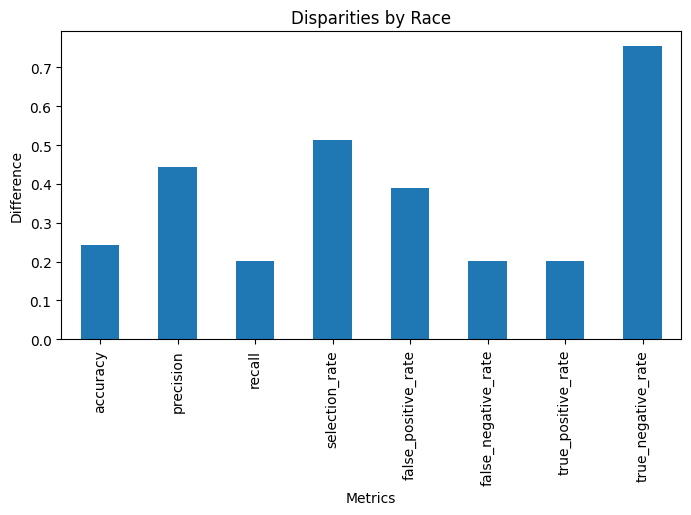

In [34]:
disparities.plot(kind='bar', figsize=(8, 4))
plt.title('Disparities by Race')
plt.xlabel('Metrics')
plt.ylabel('Difference')
plt.show()

In [35]:
metric_frame = MetricFrame(metrics=metrics,
                           y_true=df['predicted_score'],
                           y_pred=df['score_factor'],
                           sensitive_features=df['sex'])

disparities = metric_frame.difference()
print(disparities)

accuracy               0.020694
precision              0.049468
recall                 0.035784
selection_rate         0.063065
false_positive_rate    0.041288
false_negative_rate    0.035784
true_positive_rate     0.035784
true_negative_rate     0.041288
dtype: float64


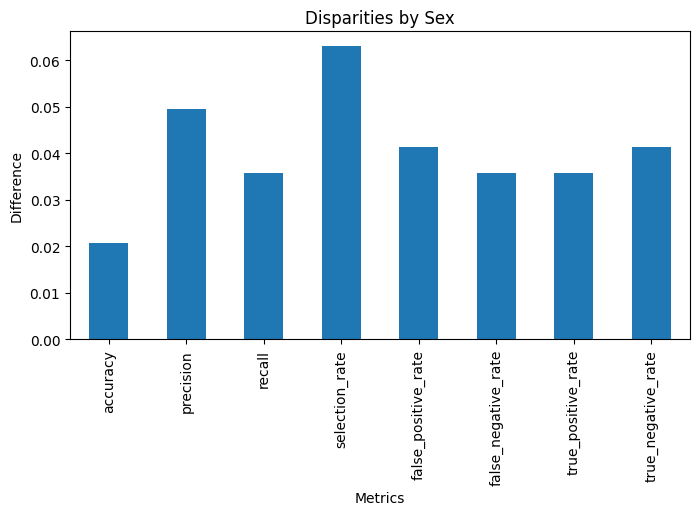

In [36]:
disparities.plot(kind='bar', figsize=(8, 4))
plt.title('Disparities by Sex')
plt.xlabel('Metrics')
plt.ylabel('Difference')
plt.show()

In [37]:
metric_frame = MetricFrame(metrics=metrics,
                           y_true=df['predicted_score'],
                           y_pred=df['score_factor'],
                           sensitive_features=df['age_cat'])

disparities = metric_frame.difference()
print(disparities)

accuracy               0.050909
precision              0.458904
recall                 0.146718
selection_rate         0.431961
false_positive_rate    0.354098
false_negative_rate    0.146718
true_positive_rate     0.146718
true_negative_rate     0.354098
dtype: float64


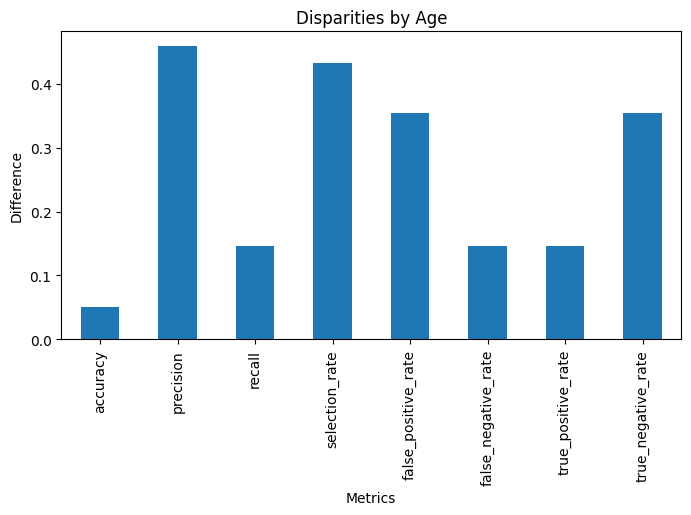

In [38]:
disparities.plot(kind='bar', figsize=(8, 4))
plt.title('Disparities by Age')
plt.xlabel('Metrics')
plt.ylabel('Difference')
plt.show()

In [39]:
eod_race = equalized_odds_difference(y_true=df['predicted_score'],
                                     y_pred=df['score_factor'],
                                     sensitive_features=df['race'])

print(f'Equalized Odds Difference (Race): {eod_race}')

eod_sex = equalized_odds_difference(y_true=df['predicted_score'],
                                    y_pred=df['score_factor'],
                                    sensitive_features=df['sex'])

print(f'Equalized Odds Difference (Sex): {eod_sex}')

eod_age = equalized_odds_difference(y_true=df['predicted_score'],
                                    y_pred=df['score_factor'],
                                    sensitive_features=df['age_cat'])

print(f'Equalized Odds Difference (Age): {eod_age}')

Equalized Odds Difference (Race): 0.38823529411764707
Equalized Odds Difference (Sex): 0.04128751867445335
Equalized Odds Difference (Age): 0.3540983606557377


In [40]:
tpr_race = MetricFrame(metrics=true_positive_rate, y_true=df['predicted_score'],
                       y_pred=df['score_factor'], sensitive_features=df['race'])
fpr_race = MetricFrame(metrics=false_positive_rate, y_true=df['predicted_score'],
                       y_pred=df['score_factor'], sensitive_features=df['race'])

tpr_ratio = tpr_race.overall / tpr_race.by_group
fpr_ratio = fpr_race.overall / fpr_race.by_group

In [41]:
print(f'Equalized Odds Ratio (TPR): {tpr_ratio}')

Equalized Odds Ratio (TPR): race
African-American    0.994906
Caucasian           1.046160
Hispanic            0.962812
Native American     0.834437
Other               0.917881
Name: true_positive_rate, dtype: float64


In [42]:
print(f'Equalized Odds Ratio (FPR): {fpr_ratio}')

Equalized Odds Ratio (FPR): race
African-American    0.785824
Caucasian           1.244746
Hispanic            1.169492
Native American          inf
Other               0.991525
Name: false_positive_rate, dtype: float64


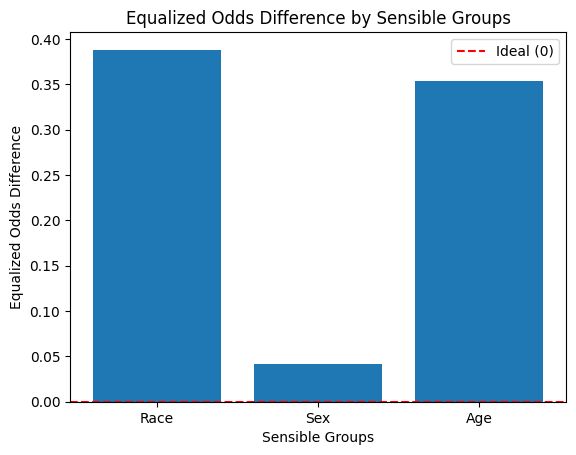

In [43]:
eod_metrics = {
    'Race': eod_race,
    'Sex': eod_sex,
    'Age': eod_age
}


plt.bar(eod_metrics.keys(), eod_metrics.values())
plt.title('Equalized Odds Difference by Sensible Groups')
plt.ylabel('Equalized Odds Difference')
plt.xlabel('Sensible Groups')
plt.axhline(0, color='red', linestyle='--', label='Ideal (0)')
plt.legend()
plt.show()

# AIF360

In [44]:
categorical_columns = [
    'score_text', 'v_score_text', 'c_charge_degree', 'age_cat', 'sex',
    'r_charge_degree', 'vr_charge_degree', 'race'
]

for col in categorical_columns:
    df[col] = df[col].astype(str)

label_encoder = LabelEncoder()

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])


print(label_encoder.classes_)
df['score_factor'] = df['score_factor'].astype(int)
df['decile_score'] = df['decile_score'].astype(int)
print(df['race'].value_counts())
sensitive_features = ['race']
target_column = 'score_factor'

aif_dataset = BinaryLabelDataset(
    favorable_label=0,
    unfavorable_label=1,
    df=df,
    label_names=['predicted_score'],
    protected_attribute_names=sensitive_features
)

['African-American' 'Caucasian' 'Hispanic' 'Native American' 'Other']
race
0    426
1    186
2     38
4     37
3      2
Name: count, dtype: int64


In [45]:
dataset_metric = BinaryLabelDatasetMetric(aif_dataset,
                                          privileged_groups=[{'race': 1}],
                                          unprivileged_groups=[{'race': 0}])

print("Disparate Impact:", dataset_metric.disparate_impact())
print("Statistical Parity Difference:", dataset_metric.statistical_parity_difference())

classification_metric = ClassificationMetric(
    aif_dataset,
    aif_dataset,
    privileged_groups=[{'race': 1}],
    unprivileged_groups=[{'race': 0}]
)

print("Equal Opportunity Difference:", classification_metric.equal_opportunity_difference())
print("Average Odds Difference:", classification_metric.average_odds_difference())

Disparate Impact: 0.363849765258216
Statistical Parity Difference: -0.34885658034226863
Equal Opportunity Difference: 0.0
Average Odds Difference: 0.0


In [46]:
RW = Reweighing(unprivileged_groups=[{'race': 0}],
                privileged_groups=[{'race': 1}])

aif_dataset_transf = RW.fit_transform(aif_dataset)

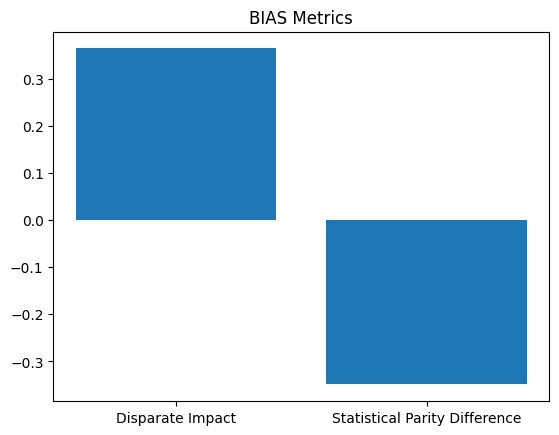

In [47]:
metrics = ["Disparate Impact", "Statistical Parity Difference"]
values = [dataset_metric.disparate_impact(), dataset_metric.statistical_parity_difference()]

plt.bar(metrics, values)
plt.title("BIAS Metrics")
plt.show()